# Cel: maksymalizacja funkcji

In [201]:
import numpy as np
import matplotlib.pyplot as plt
import math

Funkcja którą chcemy maksymalizować: f(x) = -0.1*x^4 + 0.8*x^3 - x^2 + 5*sin(2*x) + 3*cos(x) + 20

In [202]:
def fx(x):
    return -0.1*x**4 + 0.8*x**3 - x**2  + 5*np.sin(2*x)+3*np.cos(x) + 20

Wyświetlmy wykres

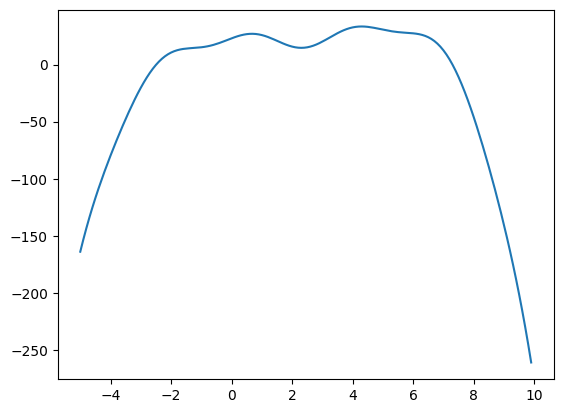

In [203]:
zakres = np.arange(-5, 10,step=0.1)
plt.plot(zakres,[fx(x) for x in zakres])

Ustawmy parametry:

In [204]:
p = 50 # liczba populacji
n = 10000 # liczba pokolen
r = 20 # liczba bitów na jednego osobnika
current_n = 0 # bierzące pokolenie
e = 0.001 # różnica pomijalna do zatrzymania

# Ustawienie stałego ziarna losowości
np.random.seed(42) 

Kodowanie: 

zamieniamy bity na liczbę zmiennoprzecinkową z podanego zakresu

In [205]:
def kodowanie(bin):
    # Konwertuj bity na liczbę z zakresu [0, 1]
    suma = 0
    for i in range(r):
        suma += bin[i] * 2**(-i - 1)
    
    # Przeskaluj do zakresu [-5, 10]
    x_min, x_max = -5, 10
    return x_min + suma * (x_max - x_min)

Losujemy początkową populację

In [206]:
def początkowa_populacja():
    pop = []
    for i in range(p):  # dla p osobników i r genów losujemy z 50% pstwem czy bit ma 0 czy 1
        pop.append([int(np.random.random()<0.5) for _ in range(r)])
    return pop

Ocena: 

Wykorzystujemy powyżej przedstawione kodowanie, po czym podstawiamy osiągnietą wartość
do funkcji f(x)

In [207]:
def ocena(b):
    oceny = []
    for i in b:
        flt = kodowanie(i)
        oceny.append(float(fx(flt)))
    return oceny

Warunek stopu: 

zatrzymujemy algorytm jeśli
1. liczba pokoleń przekroczy ustaloną wartość
2. różnica ocen w populacji jest wystarczająco mała

In [208]:
def stop(Fx_pop):
    if max(Fx_pop) - min(Fx_pop) <= e or current_n >= n:
        return True
    return False


Selekcja:

Wykorzystamy tutaj metodę ruletki. Wybieramy spośród zbioru, gdzie im lepszy wynik, tym szansa na wybranie wzrasta. Z racji że część wartości jest ujemna, normalizujemy je do wartości dodatnich

In [209]:
def selekcja(pop, oceny):
    
    # Normalizujemy oceny do wartości dodatnich (jeśli są ujemne)
    min_ocena = min(oceny)
    if min_ocena < 0:
        oceny_znorm = [oc - min_ocena + 1 for oc in oceny]
    else:
        oceny_znorm = oceny
    
    suma_ocen = sum(oceny_znorm)
    
    # Obliczamy prawdopodobieństwa wyboru dla każdego osobnika
    pstwa = [oc / suma_ocen for oc in oceny_znorm]
    
    wybrani_indeksy = np.random.choice(
        len(pop), 
        size=p, 
        p=pstwa
    )
    
    return [pop[i] for i in wybrani_indeksy]

Krzyżowanie:

Skorzystamy tutaj z krzyżowania jednopunktowego. Wybieramy punkt cięcia i dzielimy 2 rodziców między sobą, tworząc dwójkę dzieci w taki sposób. Ustawiamy prawdopodobieństwo zajścia krzyżowania na 70%


In [210]:
def krzyzowanie(pop, pk=0.7):
    nowa_pop = []
    
    # Przetwarzamy populację parami
    for i in range(0, len(pop), 2):
        rodzic1 = pop[i]
        rodzic2 = pop[i+1] if i+1 < len(pop) else pop[0]  # jeśli nieparzysta liczba, bierzemy pierwszego
        
        # Losujemy czy będzie krzyżowanie
        if np.random.random() < pk:
            # Losujemy punkt cięcia (od 1 do r-1, )
            punkt = np.random.randint(1, r)
            
            # Tworzymy dzieci wymieniając fragmenty
            dziecko1 = rodzic1[:punkt] + rodzic2[punkt:]
            dziecko2 = rodzic2[:punkt] + rodzic1[punkt:]
            
            nowa_pop.append(dziecko1)
            nowa_pop.append(dziecko2)
        else:
            # Bez krzyżowania - przekazujemy rodziców bez zmian
            nowa_pop.append(rodzic1)
            nowa_pop.append(rodzic2)
    
    return nowa_pop[:len(pop)]  

Mutacja:

Ustawiamy niskie prawdopodobieństwo na odwrócenie pojedyńczego genu

In [211]:
def mutacja(pop):
    pm = 0.01  # prawdopodobieństwo mutacji
    nowa_pop = [osobnik[:] for osobnik in pop]  
    for osobniki in nowa_pop:
        for i in range(len(osobniki)):
            if np.random.random() <= pm:
                if osobniki[i] == 0:
                    osobniki[i] = 1
                else:
                    osobniki[i] = 0
    return nowa_pop

## Algorytm  Genetyczny

Zatrzymano w pokoleniu 10000
[3.9731979370117188, 3.519110679626465, 5.639243125915527, 5.6401872634887695, 5.895819664001465, 4.671759605407715, 4.915289878845215, 5.306220054626465, 4.138178825378418, 5.111227035522461, 5.0592851638793945, 3.987860679626465, 6.200003623962402, 5.071845054626465, 5.851874351501465, 3.975214958190918, 6.235651969909668, 6.200003623962402, 5.492057800292969, 5.019888877868652, 4.123358726501465, 5.133986473083496, 5.967259407043457, 5.402107238769531, 4.866795539855957, 5.823721885681152, 4.866795539855957, 6.095690727233887, 4.064764976501465, 5.640244483947754, 4.911684989929199, 6.095690727233887, 5.853877067565918, 4.910712242126465, 4.910941123962402, 5.262188911437988, 6.230673789978027, 5.853877067565918, 5.071845054626465, 3.973212242126465, 4.885993003845215, 4.933357238769531, 4.911684989929199, 5.850071907043457, 4.936118125915527, 4.123358726501465, 3.987889289855957, 5.823493003845215, 5.823493003845215, 5.027928352355957]
Oceny
[32.4282404

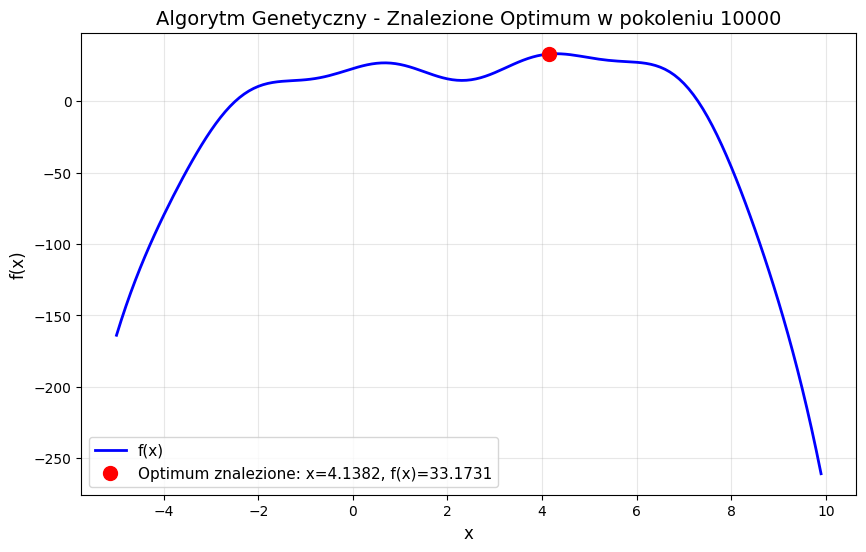

In [212]:
pop_pocz = początkowa_populacja()

pop_current = pop_pocz
while True:
    current_n += 1
    oceny = ocena(pop_current)
    if stop(oceny):
        print(f"Zatrzymano w pokoleniu {current_n}")
        print([kodowanie(i) for i in pop_current])
        print("Oceny")
        print(ocena(pop_current))
        
        # Znalezienie najlepszego osobnika
        najlepsza_ocena = max(oceny)
        besat_ind = oceny.index(najlepsza_ocena)
        najlepszy_osobnik = pop_current[besat_ind]
        
        print("\n=== Najlepszy osobnik ===")
        print(f"Chromosom (geny): {najlepszy_osobnik}")
        print(f"Wartość dekodowana: {kodowanie(najlepszy_osobnik)}")
        print(f"Przystosowanie (fitness): {najlepsza_ocena}")
        
        # Wykres z zaznaczonym optimum
        x_optimal = kodowanie(najlepszy_osobnik)
        y_optimal = najlepsza_ocena
        
        plt.figure(figsize=(10, 6))
        plt.plot(zakres, [fx(x) for x in zakres], 'b-', label='f(x)', linewidth=2)
        plt.plot(x_optimal, y_optimal, 'ro', markersize=10, label=f'Optimum znalezione: x={x_optimal:.4f}, f(x)={y_optimal:.4f}')
        plt.xlabel('x', fontsize=12)
        plt.ylabel('f(x)', fontsize=12)
        plt.title(f'Algorytm Genetyczny - Znalezione Optimum w pokoleniu {current_n}', fontsize=14)
        plt.legend(fontsize=11)
        plt.grid(True, alpha=0.3)
        plt.show()
        break
    else:
        pop1 = selekcja(pop_current, oceny)
        pop2 = krzyzowanie(pop1)
        pop3 = mutacja(pop2)
        pop_current = pop3